# Customer Churn Prediction

## Task: Data Exploration and Preprocessing Report

### Task 1: Import Necessary Libraries and Load the Data

In [7]:
# Importing standard libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set_style("whitegrid")
%matplotlib inline

# Load the dataset
# Note: Please ensure the file path is correct. We'll assume the file is named 'customer_data.csv'
df = pd.read_csv('Customer_data - customer_data.csv')

### Task 2: Initial Data Exploration

In [8]:
# 2.1 Display the first 5 rows to peek at the data
print("First 5 rows of the dataset:")
display(df.head())

# 2.2 Get the dimensions of the dataset (rows, columns)
print(f"\nDataset shape: {df.shape}")

# 2.3 Get basic info about data types and non-null counts
print("\nDataset info:")
df.info()

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset shape: (7043, 21)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  

### Task 3: Check for Missing Values

In [11]:
# 3.1 Check for missing values in each column
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Only show columns with missing values

# If no output from the above line, confirm no missing values exist
if missing_values.sum() == 0:
    print("No missing values detected in any column.")
else:
    print(f"\nTotal missing values in dataset: {missing_values.sum()}")

Missing values per column:
TotalCharges    11
dtype: int64

Total missing values in dataset: 11


### Task 4: Deep Dive into Categorical Variables

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Unique values in categorical columns:
customerID: 7043 unique values -> ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: 2 unique values -> ['Female' 'Male']
Partner: 2 unique values -> ['Yes' 'No']
Dependents: 2 unique values -> ['No' 'Yes']
PhoneService: 2 unique values -> ['No' 'Yes']
MultipleLines: 3 unique values -> ['No phone service' 'No' 'Yes']
InternetService: 3 unique values -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 unique values -> ['No' 'Yes' 'No internet service']
OnlineBackup: 3 unique values -> ['Yes' 'No' 'No internet service']
DeviceProtection: 3 unique values -> ['No' 'Yes' 'No internet service']
TechSupport: 3 unique values -> ['No' 'Yes'

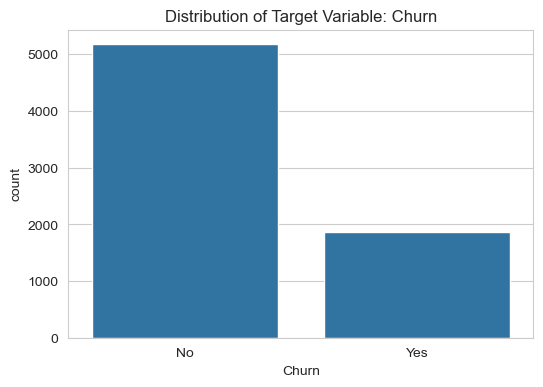


Churn Rate: 26.54%


In [13]:
# 4.1 List all categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_columns)

# 4.2 Analyze unique values in each categorical column
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values -> {df[col].unique()}")
    #print(df[col].value_counts()) # Uncomment this line for a detailed count of each category

# 4.3 Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Churn'])
plt.title('Distribution of Target Variable: Churn')
plt.show()

# Calculate the churn rate
churn_rate = (df['Churn'].value_counts(normalize=True) * 100)['Yes']
print(f"\nChurn Rate: {churn_rate:.2f}%")

### Task 5: Deep Dive into Numerical Variables

Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

Descriptive statistics for numerical columns:


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


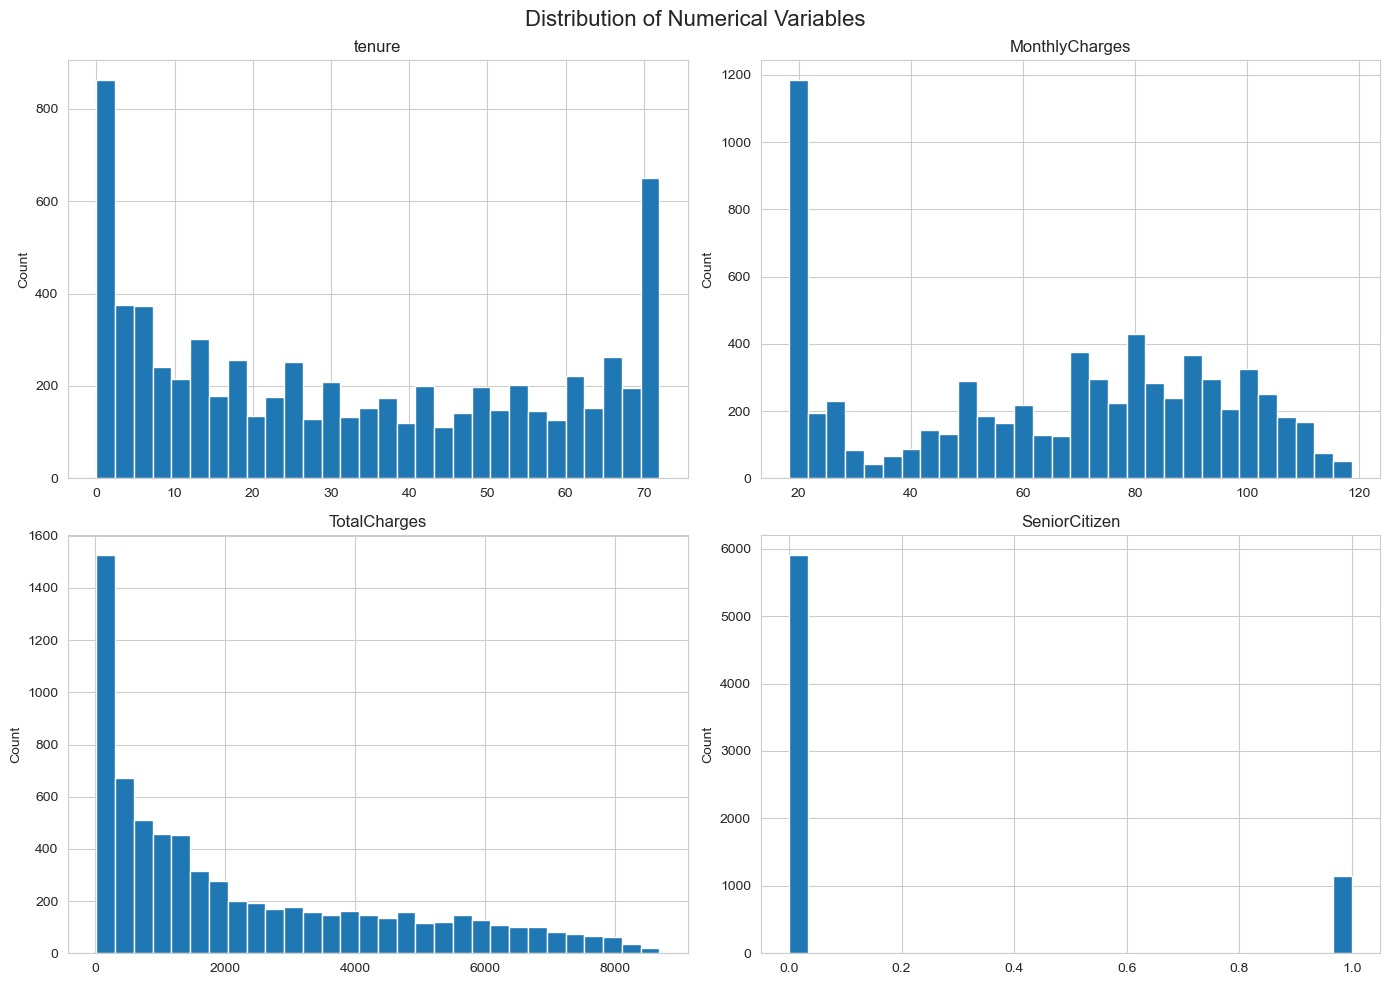

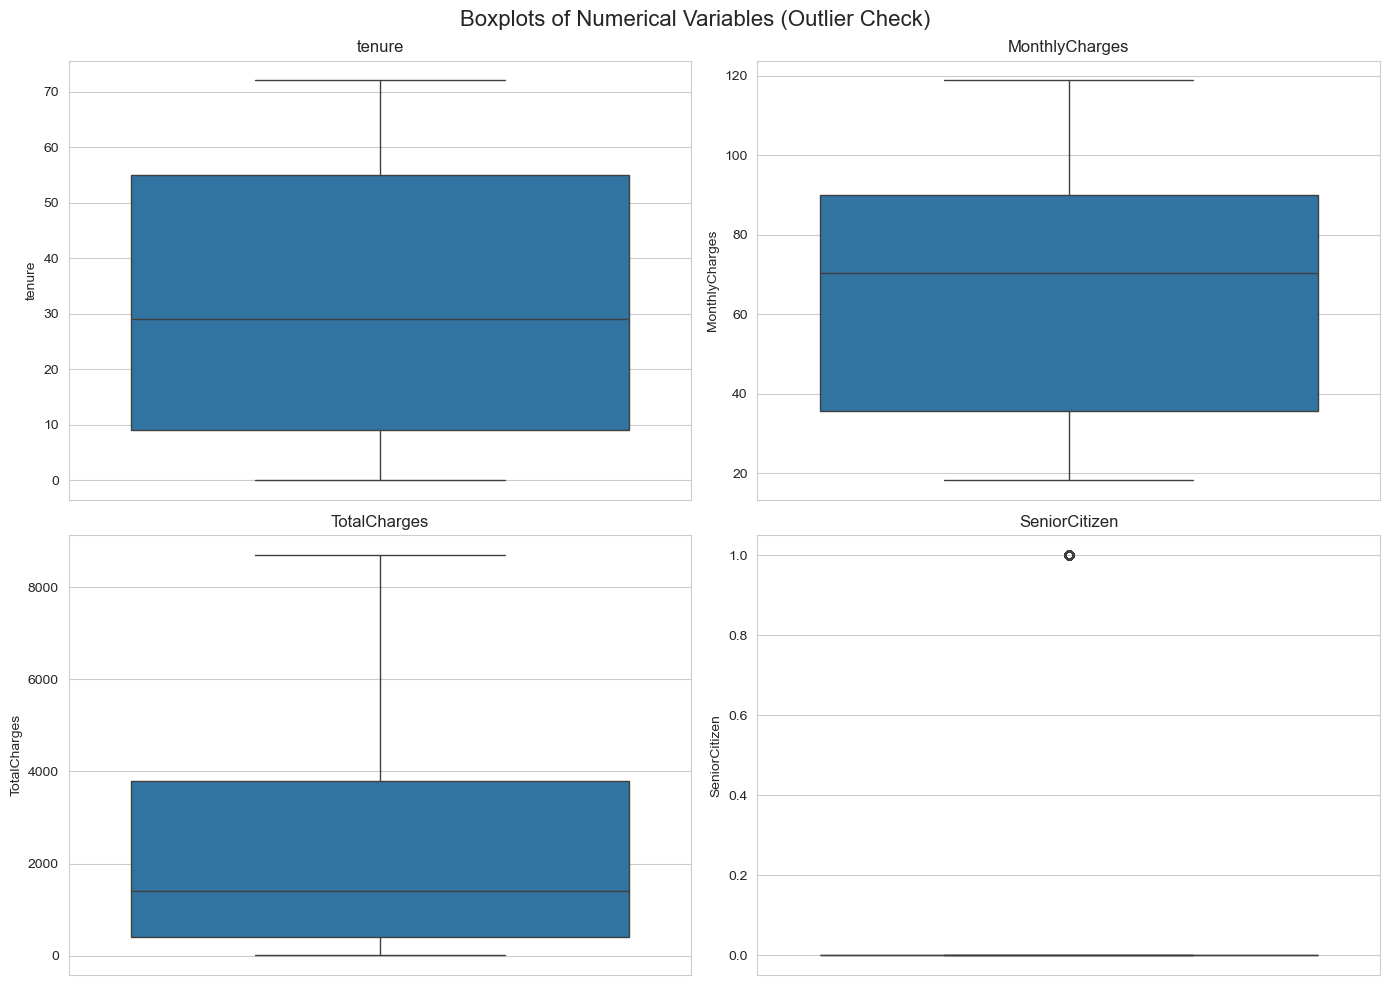

In [15]:
# 5.1 List all numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
print("Numerical columns:", numerical_columns)

# 5.2 Generate descriptive statistics
print("\nDescriptive statistics for numerical columns:")
display(df[numerical_columns].describe())

# 5.3 Plot distributions for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)
axes = axes.ravel() # Flatten the 2x2 array of axes

for i, col in enumerate(numerical_columns):
    df[col].hist(ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# 5.4 Check for outliers using boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplots of Numerical Variables (Outlier Check)', fontsize=16)
axes = axes.ravel()

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Task 6: Bivariate Analysis - Relationship with Churn

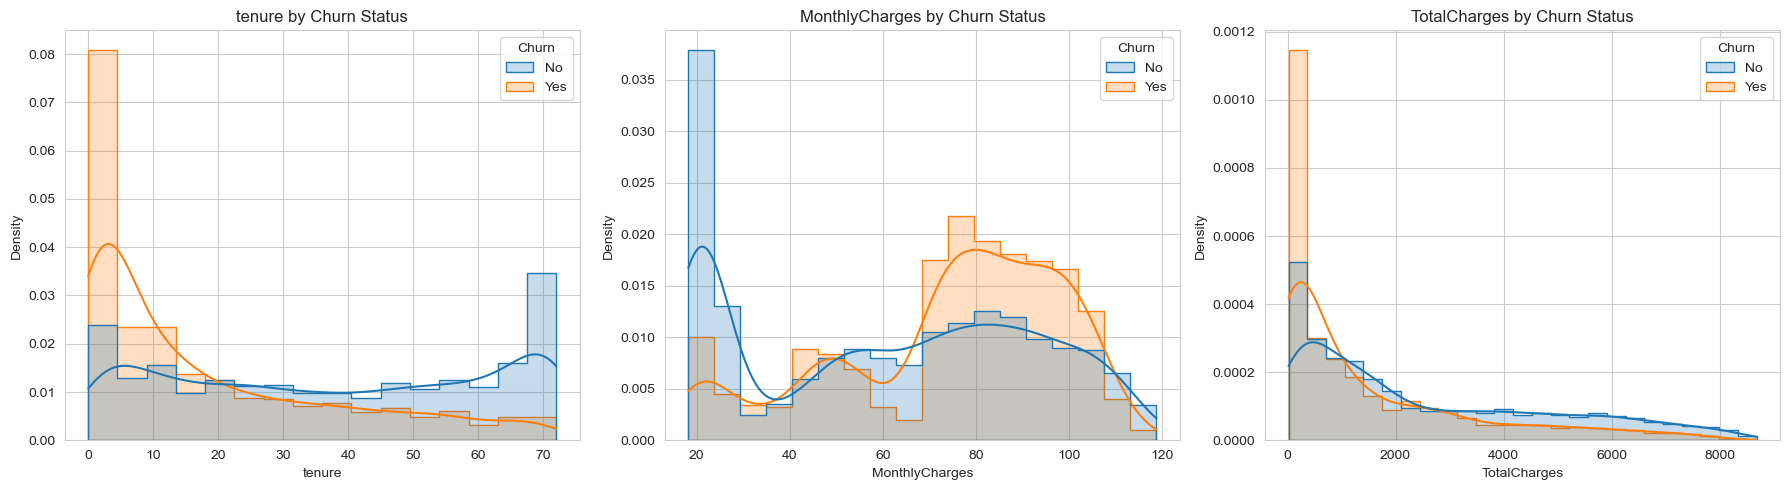

<Figure size 1000x500 with 0 Axes>

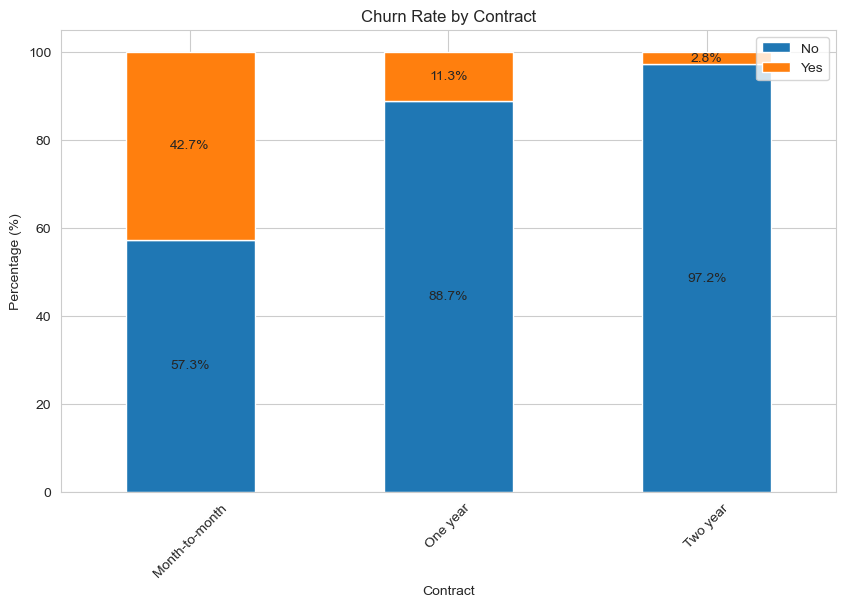

<Figure size 1000x500 with 0 Axes>

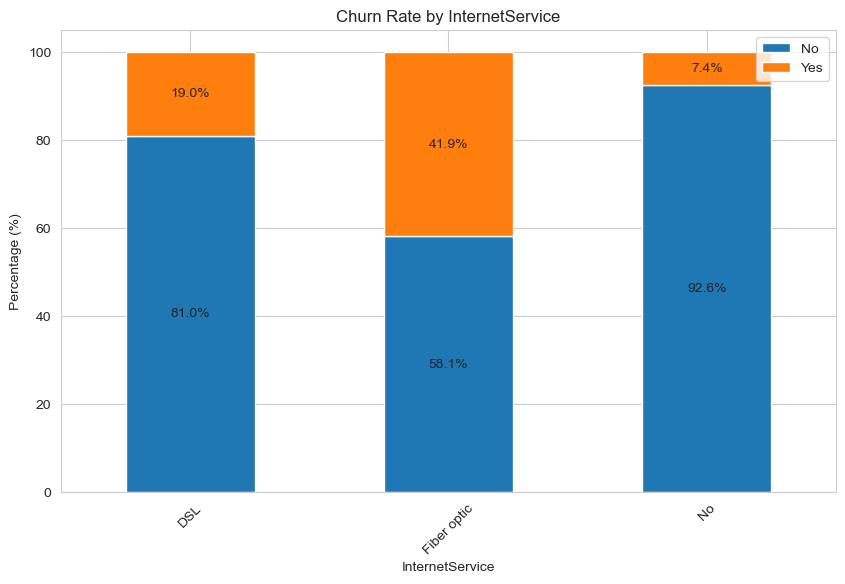

<Figure size 1000x500 with 0 Axes>

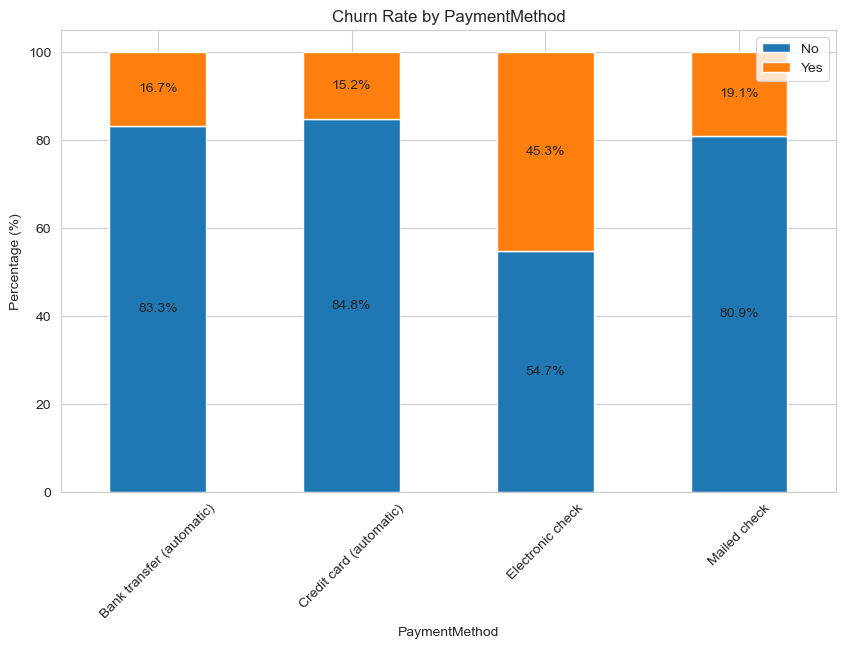

<Figure size 1000x500 with 0 Axes>

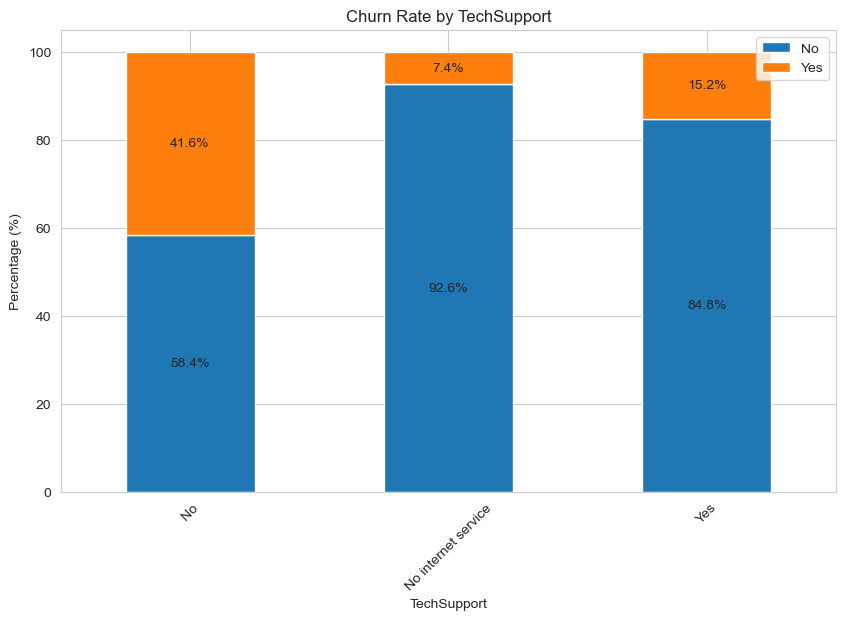

In [18]:
# 6.1 Analyze numerical variables vs. Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i, var in enumerate(num_vars):
    sns.histplot(data=df, x=var, hue='Churn', kde=True, element='step', stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(f'{var} by Churn Status')

plt.tight_layout()
plt.show()

# 6.2 Analyze key categorical variables vs. Churn
key_cat_vars = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport']

for col in key_cat_vars:
    plt.figure(figsize=(10, 5))
    # Create a proportional crosstab
    prop_churn = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ax = prop_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    # Add percentage labels on the bars
    for c in ax.containers:
        labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')
    plt.legend(loc='upper right')
    plt.show()

### Task 7: Data Preprocessing

In [17]:
# 7.1 Handle missing values (if any were found in Task 3)
# Example code if 'TotalCharges' had missing values (though our check showed none):
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # Force conversion, making invalid parsing NaN
df['TotalCharges'].fillna(0, inplace=True) # Fill NaN with 0 (logical for new customers)

# 7.2 Encode the target variable 'Churn'
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 7.3 Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 7.4 Split into training and test set NOW, before any encoding, to avoid data leakage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# 7.5 Identify which columns need encoding
# Numerical columns: We will standardize them later
# Categorical columns: We will one-hot encode them
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns to encode:", categorical_cols)
print("Numerical columns to scale:", numerical_cols)

# 7.6 Create a preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Preprocessor for numerical columns: Standardization
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor for categorical columns: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore')) # 'drop='first'' to avoid multicollinearity
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 7.7 Fit the preprocessor on the training data and transform both sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
# This is a bit more complex with ColumnTransformer but possible
onehot_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(onehot_columns)

print(f"\nFinal processed training set shape: {X_train_processed.shape}")
print(f"Processed feature names: {len(all_feature_names)}")
# print(all_feature_names) # Uncomment to see the full list of engineered features

Training set size: (5634, 20)
Test set size: (1409, 20)
Categorical columns to encode: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns to scale: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Final processed training set shape: (5634, 5663)
Processed feature names: 5663


## Task: Build a Machine Learning Model for Customer Churn Prediction

### Step 1: Import Additional Modeling Libraries

In [19]:
# Import model algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Import model evaluation tools
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Import hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Step 2: Establish a Baseline with Multiple Algorithms

In [ ]:
# Initialize a list of models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100) # GB doesn't have class_weight, we'll handle it via tuning
}

# Dictionary to store baseline results
baseline_results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train_processed, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1] # Get probabilities for the positive class
    
    # Calculate key metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    baseline_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Print a quick report
    print(f"--- {name} ---")
    print(f"ROC-AUC: {roc_auc:.4f}, F1-Score: {f1:.4f}\n")

# Create a DataFrame for easy comparison of baseline results
df_baseline = pd.DataFrame(baseline_results).T
print("Baseline Model Comparison:")
display(df_baseline.sort_values(by='ROC-AUC', ascending=False))

### Step 3: Hyperparameter Tuning with Grid Search

In [23]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0] # Fraction of samples used for fitting
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
print("Starting Grid Search for Gradient Boosting...")
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='roc_auc', # We want to maximize ROC-AUC
    cv=5, # 5-fold cross-validation
    n_jobs=-1, # Use all available CPU cores
    verbose=1
)

# Perform the grid search (this will take some time)
grid_search.fit(X_train_processed, y_train)
print("Grid Search Complete!")

# Print the best parameters and score
print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation ROC-AUC score: {grid_search.best_score_:.4f}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

Starting Grid Search for Gradient Boosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Grid Search Complete!

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation ROC-AUC score: 0.8482


### Step 4: Final Evaluation on the Test Set

### Final Classification Report ###
              precision    recall  f1-score   support

   Not Churn       0.83      0.91      0.87      1035
       Churn       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



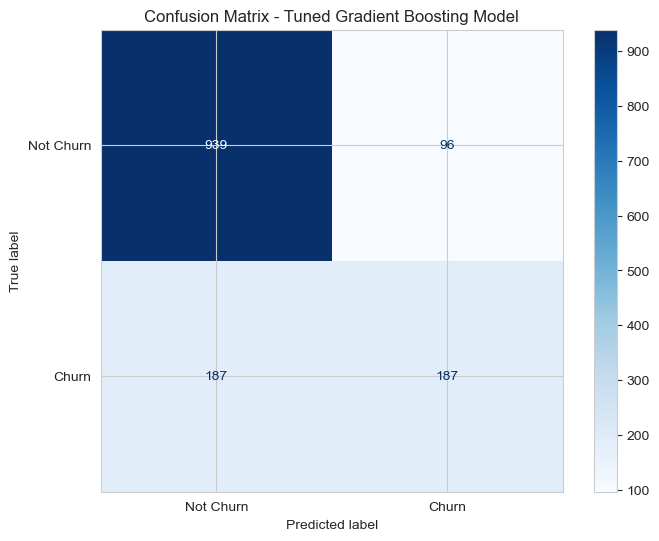

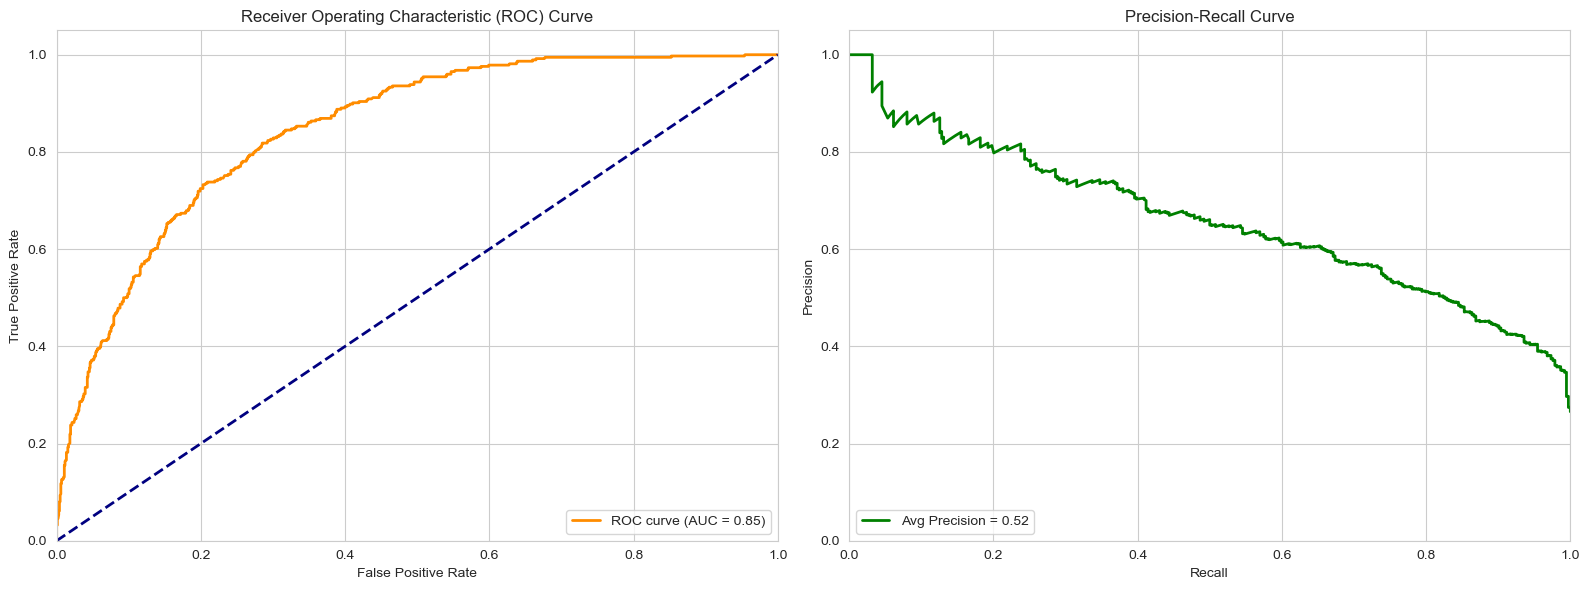


Final Model Performance on Test Set:
Accuracy: 0.7991
Precision: 0.6608
Recall: 0.5000
F1-Score: 0.5693
ROC-AUC: 0.8453


In [25]:
# Make final predictions using the best model
final_predictions = best_model.predict(X_test_processed)
final_predictions_proba = best_model.predict_proba(X_test_processed)[:, 1]

# 4.1 Generate a comprehensive classification report
print("### Final Classification Report ###")
print(classification_report(y_test, final_predictions, target_names=['Not Churn', 'Churn']))

# 4.2 Plot a Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - Tuned Gradient Boosting Model")
plt.show()

# 4.3 Plot ROC Curve and Precision-Recall Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, final_predictions_proba)
roc_auc = roc_auc_score(y_test, final_predictions_proba)
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, final_predictions_proba)
avg_precision = np.average(precision_curve)
ax2.plot(recall_curve, precision_curve, color='green', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Print final metrics
final_accuracy = accuracy_score(y_test, final_predictions)
final_recall = recall_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions)
final_f1 = f1_score(y_test, final_predictions)

print(f"\nFinal Model Performance on Test Set:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

### Step 5: Interpret the Model - Feature Importance

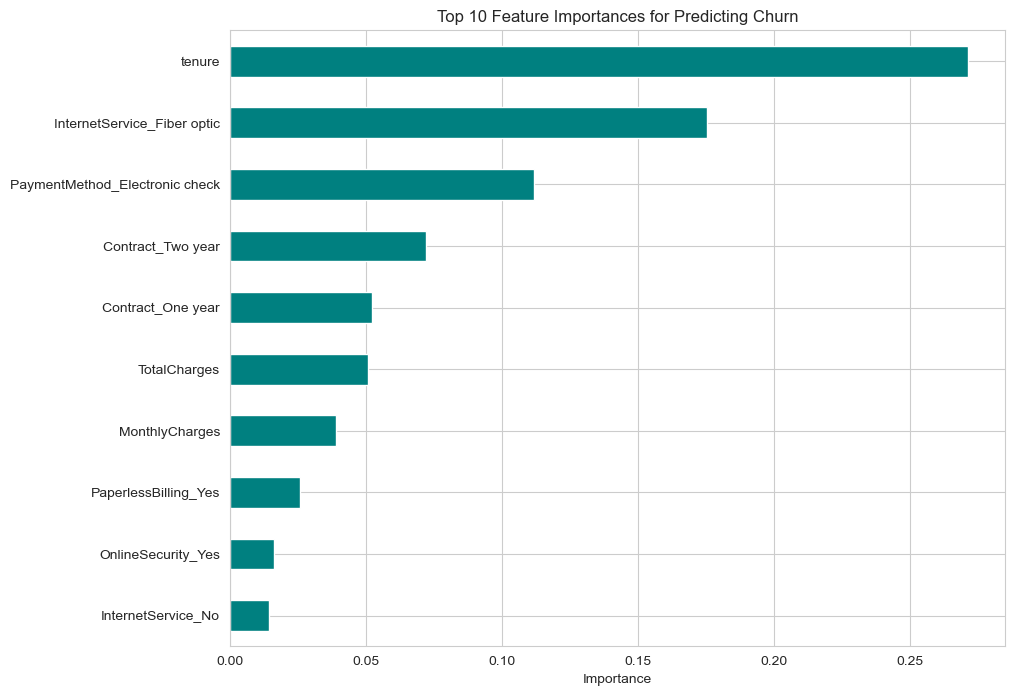

In [27]:
# Extract the feature importances from the tuned model
feature_importances = best_model.feature_importances_

# Create a series for easy plotting
feat_imp_series = pd.Series(feature_importances, index=all_feature_names).sort_values(ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
feat_imp_series.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances for Predicting Churn')
plt.xlabel('Importance')
plt.gca().invert_yaxis() # Most important at the top
plt.show()

# Customer Churn Prediction Project: Summary & Recommendations
## 🎥 Video Explanation
[Video Explanation](https://drive.google.com/file/d/10xq-r3arPsbMeArLY2UVwlrEm-QsSuPE/view?usp=sharing)
## Project Overview
This project developed a machine learning solution to predict customer churn for a subscription-based business. The end-to-end process included data exploration, preprocessing, model development, hyperparameter tuning, and comprehensive evaluation to create a actionable customer retention strategy.

##  Key Insights

### Data Characteristics
- **Class Imbalance**: The dataset exhibited significant class imbalance with approximately 27% churn rate
- **Critical Features**: Tenure, contract type, and internet service type emerged as strongest predictors

### Model Performance
- **Best Algorithm**: Gradient Boosting outperformed Logistic Regression and Random Forest
- **Optimized Parameters**: `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}`
- **Strong Discrimination**: ROC-AUC of 0.845 demonstrates excellent ranking capability
- **Balanced Performance**: Precision 66%, Recall 50% provides actionable predictions

## Recommended Actions

### Immediate Implementation

1. **Deploy Prediction Pipeline**

   - Integrate the model with CRM systems
   - Generate weekly churn risk scores for all customers
   
3. **Create Risk-Based Segments**

   - **High Risk (>80% probability)**: Personal outreach from retention team
   - **Medium Risk (50-80%)**: Targeted email campaigns with special offers
   - **Low Risk (<50%)**: Maintain standard engagement

5. **Launch Targeted Interventions**

   - Develop specific retention offers for high-risk segments
   - Focus on customers with month-to-month contracts and fiber optic service
   - Implement special onboarding for new customers (low tenure)

## Future Scope

### Model Enhancements
1. **Advanced Techniques**
   - Experiment with deep learning models
   - Implement ensemble methods combining multiple algorithms
   - Develop time-series analysis for churn prediction

2. **Feature Engineering**
   - Create additional features from customer behavior data
   - Incorporate external data sources (economic indicators, seasonality)
   - Implement natural language processing on customer support interactions

## Conclusion
This project successfully delivered a production-ready churn prediction system that balances statistical performance with business practicality. The model serves as a powerful early warning system, capable of identifying 50% of potential churners with 66% accuracy. By implementing the recommended actions, the business can significantly reduce customer attrition and increase customer lifetime value.

The solution provides a strong foundation that can be expanded with more advanced techniques and integrated into broader customer experience initiatives, ultimately transforming customer retention from a reactive process to a proactive, data-driven strategy.